In [17]:
# 1. 라이브러리 임포트
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [18]:

# 2. 데이터 로드 및 DataFrame 변환
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')


In [19]:

# 3. 데이터셋 기본 정보 확인
print("데이터 상위 5행:")
print(X.head())
print("\n데이터 통계 요약:")
print(X.describe())
print("\n클래스 분포:")
print(y.value_counts())


데이터 상위 5행:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0       

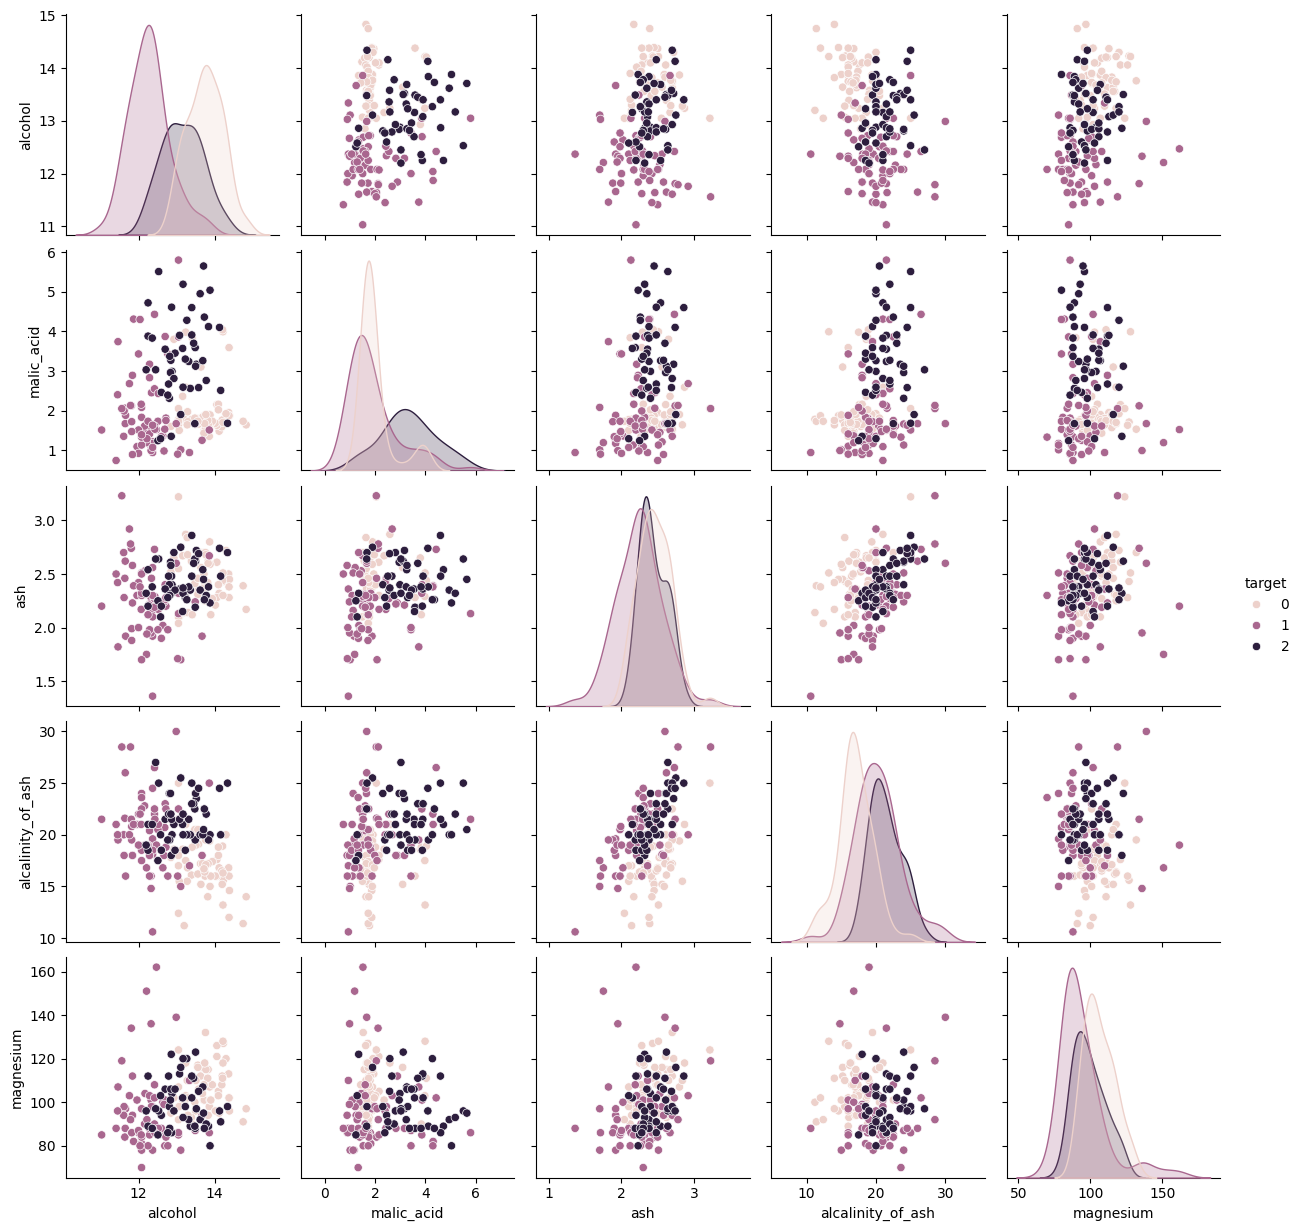

In [20]:

# 4. 일부 특징 간 상관관계 시각화 (상위 5개 특징 선택)
sns.pairplot(pd.concat([X.iloc[:, :5], y], axis=1), hue='target')
plt.show()


In [21]:

# 5. 데이터 분할 (클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [22]:

# 6. 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:

# 7. SVM 모델 학습
model = SVC(kernel='rbf', C=1.0, gamma='scale')  # 기본 RBF 커널
model.fit(X_train_scaled, y_train)


SVC()


SVM Accuracy: 0.97

분류 리포트:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

혼동 행렬:


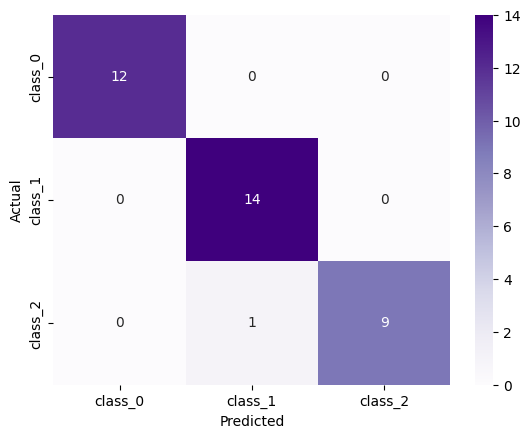

In [24]:

# 8. 예측 및 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nSVM Accuracy: {accuracy:.2f}")

print("\n분류 리포트:")
print(classification_report(y_test, y_pred))

print("혼동 행렬:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
